In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [76]:
train_data=pd.read_csv(r"C:\Users\Dell\Desktop\DATA\titanic\train.csv")
test_data=pd.read_csv(r"C:\Users\Dell\Desktop\DATA\titanic\test.csv")

In [77]:
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [78]:
import matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
matplotlib.rc_file_defaults()

def survival_plot_by_column(df: pd.DataFrame, column: str)-> None:
    train_data[column].fillna("Unk", inplace=True)
    total_counts = train_data[column].value_counts()
    survival_counts = (train_data.groupby([column,"Survived"]).size().unstack().fillna(0))
    column_values = train_data[column].unique()
    survival_ratio = [survival_counts.loc[value,1]/total_counts[value] for value in column_values]
    
    color_mapping = plt.cm.get_cmap("tab20b_r", len(survival_counts))
    bar_colors = color_mapping(np.arange(len(column_values)))
    
    plt.bar(column_values, survival_ratio, color=bar_colors)
    plt.title(f"Survival Ratio by {column}")
    plt.xlabel(column)
    plt.ylabel("Survival Ratio")
    plt.ylim(0, 1)
    plt.show()

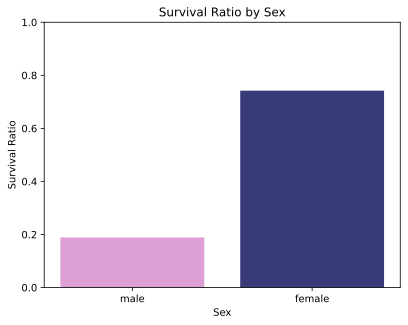

In [79]:
survival_plot_by_column(train_data, "Sex")

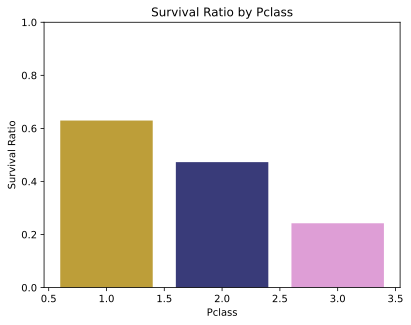

In [80]:
survival_plot_by_column(train_data, "Pclass")

In [81]:
grp=train_data.groupby("Sex")["Survived"].mean()

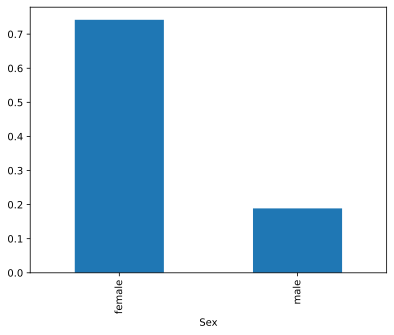

In [82]:
grp.plot(kind='bar')
plt.show()

In [83]:
grp.value_counts()

0.742038    1
0.188908    1
Name: Survived, dtype: int64

In [84]:
sr=train_data.groupby(['Sex', "Survived"]).size().unstack().fillna(0)

In [85]:
sr

Survived,0,1
Sex,,
female,81,233
male,468,109


In [86]:
column_values=train_data['Sex'].unique()

In [87]:
column_values

array(['male', 'female'], dtype=object)

In [88]:
total_counts = train_data['Sex'].value_counts()

In [89]:
total_counts

male      577
female    314
Name: Sex, dtype: int64

In [90]:
survival_ratios = [
        sr.loc[value, 1] / total_counts[value]
        for value in column_values
    ]

In [91]:
survival_ratios

[0.18890814558058924, 0.7420382165605095]

In [92]:
sr.loc['male',1]/total_counts['male']

0.18890814558058924

In [93]:
bin_edges = np.linspace(min(train_data['Age']), max(train_data['Age']),10)
print(bin_edges)
print(len(bin_edges))

[ 0.42        9.26222222 18.10444444 26.94666667 35.78888889 44.63111111
 53.47333333 62.31555556 71.15777778 80.        ]
10


In [94]:
bin_centers = [
        (bin_edges[i] + bin_edges[i + 1]) / 2
        for i in range(len(bin_edges) - 1)]
print(bin_centers)

[4.841111111111111, 13.683333333333334, 22.525555555555556, 31.367777777777782, 40.21, 49.05222222222223, 57.894444444444446, 66.73666666666668, 75.57888888888888]


In [95]:
def survival_plot(df: pd.DataFrame, column: str)->None:
    train_data[column].dropna(inplace=True)
    
    bins=10
    bin_edges = np.linspace(min(df[column]), max(df[column]), bins)
    bin_centers = [
        (bin_edges[i] + bin_edges[i + 1]) / 2
        for i in range(len(bin_edges) - 1)
    ]
    bin_width = bin_edges[1] - bin_edges[0]
    
    df[f"{column}_bin"] = pd.cut(df[column], bins=bin_edges, include_lowest=True, right=True)
        
    ratio_survived_per_bin = df.groupby(f"{column}_bin")["Survived"].mean()
    
    plt.bar(
        bin_centers,
        ratio_survived_per_bin.values,
        width=bin_width * 0.8
    )
    plt.xlabel(column)
    plt.ylabel("Ratio of Survived")
    plt.title(f"Ratio of Survived per {column} Bin")
    plt.show()
    
    #for _ in range(bin_centers):
    #   plt.hist(ratio_survived_per_bin, bins=bin_edges, color='skyblue', edgecolor='black')

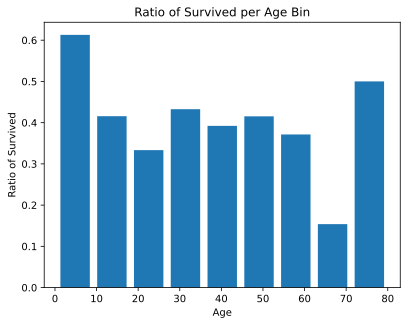

In [96]:
survival_plot(train_data,"Age")

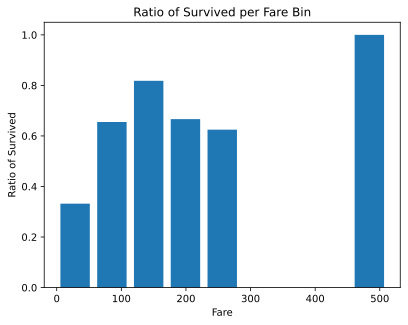

In [97]:
survival_plot(train_data,'Fare')

In [98]:
train_data['Age'].fillna(train_data['Age'].mean(), inplace=False)
ratio_survived_per_bin = train_data.groupby("Age")["Survived"].mean()
ratio_survived_per_bin.value_counts()

0.000000    23
0.500000    12
1.000000    11
0.333333     5
0.400000     4
0.461538     3
0.666667     3
0.611111     2
0.200000     2
0.250000     2
0.800000     1
0.375000     1
0.285714     1
0.111111     1
0.416667     1
0.357143     1
0.454545     1
0.166667     1
0.470588     1
0.300000     1
0.280000     1
0.833333     1
0.260870     1
0.407407     1
0.208333     1
0.714286     1
0.360000     1
0.346154     1
0.700000     1
0.352941     1
0.600000     1
Name: Survived, dtype: int64

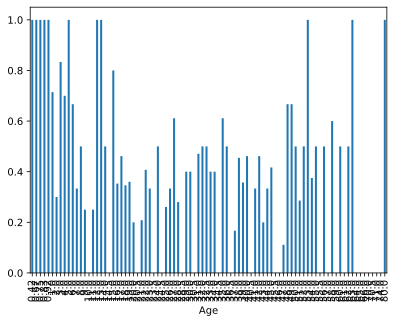

In [99]:
ratio_survived_per_bin.plot(kind='bar')
plt.show()

In [100]:
def extract_title(df: pd.DataFrame) -> None:
    df["Title"] = df.Name.str.extract(r"([A-Za-z]+)\.", expand=False)
    common_titles = ["Mr", "Miss", "Mrs", "Master"]
    df["Title"].replace(["Ms", "Mlle", "Mme"], "Miss", inplace=True)
    df["Title"].replace(["Lady"], "Mrs", inplace=True)
    df["Title"].replace(["Sir", "Rev"], "Mr", inplace=True)
    df["Title"][~df.Title.isin(common_titles)] = "Others"

In [103]:
extract_title(train_data)

<ipython-input-100-70e73974c47a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Title"][~df.Title.isin(common_titles)] = "Others"


In [104]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_bin,Fare_bin,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(18.104, 26.947]","(-0.001, 56.925]",Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(35.789, 44.631]","(56.925, 113.851]",Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(18.104, 26.947]","(-0.001, 56.925]",Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(26.947, 35.789]","(-0.001, 56.925]",Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"(26.947, 35.789]","(-0.001, 56.925]",Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,"(26.947, 35.789]","(-0.001, 56.925]",Mr
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,"(18.104, 26.947]","(-0.001, 56.925]",Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN,"(-0.001, 56.925]",Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,"(18.104, 26.947]","(-0.001, 56.925]",Mr


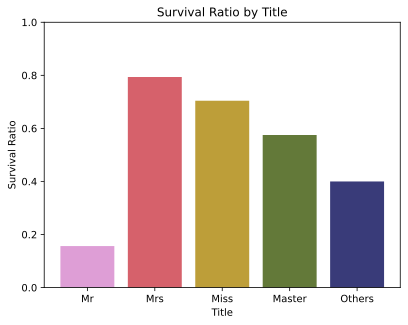

In [105]:
survival_plot_by_column(train_data,'Title')

In [108]:
def prepare_data(df: pd.DataFrame) -> pd.DataFrame:
    train_data["Age"].fillna(0, inplace=True)
    train_data["Embarked"].fillna("Unk", inplace=True)
    extract_title(train_data)
    family_size = train_data["Parch"] + train_data["SibSp"]
    train_data["Alone"] = family_size == 0

    return train_data

In [115]:
prepare_data(train_data)

<ipython-input-100-70e73974c47a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Title"][~df.Title.isin(common_titles)] = "Others"


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_bin,Fare_bin,Title,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(18.104, 26.947]","(-0.001, 56.925]",Mr,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(35.789, 44.631]","(56.925, 113.851]",Mrs,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(18.104, 26.947]","(-0.001, 56.925]",Miss,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(26.947, 35.789]","(-0.001, 56.925]",Mrs,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"(26.947, 35.789]","(-0.001, 56.925]",Mr,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,"(26.947, 35.789]","(-0.001, 56.925]",Mr,True
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,"(18.104, 26.947]","(-0.001, 56.925]",Miss,True
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,0.0,1,2,W./C. 6607,23.4500,NaN,S,NaN,"(-0.001, 56.925]",Miss,False
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,"(18.104, 26.947]","(-0.001, 56.925]",Mr,True


In [116]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_bin,Fare_bin,Title,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(18.104, 26.947]","(-0.001, 56.925]",Mr,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(35.789, 44.631]","(56.925, 113.851]",Mrs,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(18.104, 26.947]","(-0.001, 56.925]",Miss,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(26.947, 35.789]","(-0.001, 56.925]",Mrs,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"(26.947, 35.789]","(-0.001, 56.925]",Mr,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,"(26.947, 35.789]","(-0.001, 56.925]",Mr,True
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,"(18.104, 26.947]","(-0.001, 56.925]",Miss,True
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,0.0,1,2,W./C. 6607,23.4500,NaN,S,NaN,"(-0.001, 56.925]",Miss,False
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,"(18.104, 26.947]","(-0.001, 56.925]",Mr,True


In [117]:
import torch
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from torch.utils.data import DataLoader

In [118]:
class TitanicDataset(torch.utils.data.Dataset):
    def __init__(self, x: torch.Tensor, y: torch.Tensor) -> None:
        self.x = x
        self.y = y

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

In [119]:
def generate_data_loader(x: np.ndarray, y: np.ndarray or None = None, shuffle: bool = True):
    x_tensor=torch.tensor(x, dtype=torch.float32)
    y_tensor=(torch.tensor(y, dtype=torch.float32)
              if y is not None
              else torch.zeros_like(x_tensor))
    dataset=TitanicDataset(x_tensor, y_tensor)
    loader = DataLoader(dataset, batch_size=BS, shuffle=shuffle)

    return loader

In [120]:
NUMERIC_COL = ["Age", "Fare"]
CATEGORICAL_COL = ["Sex", "Pclass", "Embarked", "Title", "Alone"]

TARGET_COL = "Survived"
BS = 64
RANDOM_SEED = 42
TEST_RATIO = 0.2

def prepare_train_data(df: pd.DataFrame) -> tuple[DataLoader, DataLoader, ColumnTransformer]:
    x = df[CATEGORICAL_COL + NUMERIC_COL]
    y = df[TARGET_COL].values
    x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=TEST_RATIO, random_state=RANDOM_SEED)
    pipeline = ColumnTransformer(
        [
            ("num", StandardScaler(), NUMERIC_COL),
            ("cat",OneHotEncoder(handle_unknown="ignore"), CATEGORICAL_COL),
        ]
    )
    x_train = pipeline.fit_transform(x_train)
    x_val = pipeline.transform(x_val)
    
    return (
        generate_data_loader(x_train,y_train,True),
        generate_data_loader(x_val,y_val, False),
        pipeline,
    )

def prepare_test_data(df: pd.DataFrame, pipeline: ColumnTransformer) -> tuple[DataLoader, pd.DataFrame]:
    x = df[CATEGORICAL_COL + NUMERIC_COL]
    x = pipeline.transform(x)
    return generate_data_loader(x, None, False), df["PassengerId"]

In [121]:
prepare_train_data(train_data)

(<torch.utils.data.dataloader.DataLoader at 0x1caf1661eb0>,
 ColumnTransformer(transformers=[('num', StandardScaler(), ['Age', 'Fare']),
                                 ('cat', OneHotEncoder(handle_unknown='ignore'),
                                  ['Sex', 'Pclass', 'Embarked', 'Title',
                                   'Alone'])]))

In [146]:
import torch
import torch.nn as nn
class MultilayerPerceptron(nn.Module):
    def __init__(self, input_size: int , output_size: int) -> None:
        super(MultilayerPerceptron, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        #self.fc2 = nn.Linear(28,64)
        self.fc3 = nn.Linear(64, 256)
        self.fc4 = nn.Linear(256, 64)
        self.fc5 = nn.Linear(64, output_size)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x: torch.Tensor)-> tuple[torch.Tensor, torch.Tensor]:
        x = self.fc1(x)
        x = self.relu(x)
        #x = self.fc2(x)
        #x = self.relu(x)
        x = self.fc3(x)
        x = self.relu(x)
        x = self.fc4(x)
        x = self.relu(x)
        x = self.fc5(x)
        pred = self.sigmoid(x)
        return x, torch.argmax(pred, dim=1)

In [147]:
a=torch.randn(4,4)
a

tensor([[-0.7139, -2.2602,  0.6233,  1.2395],
        [ 0.7968, -1.2216,  1.2910, -1.1404],
        [ 0.3040, -0.3461, -0.5491,  0.0973],
        [-1.0989, -0.9383,  0.6932,  0.9428]])

In [148]:
torch.argmax(a, dim=1)

tensor([3, 2, 0, 3])

In [149]:
import math
import torch.optim as optim
from torch.optim.lr_scheduler  import MultiStepLR

In [150]:
import random

import numpy as np
import torch


def set_seeds(seed: int) -> None:
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)

In [159]:
INPUT_SIZE = 18
OUTPUT_SIZE = 2
epochs = 250
LR = 0.001
MODEL_PATH=r"C:\Users\Dell\Untitled Folder 2\temp.ckpt"
RANDOM_SEED = 42

def train() -> tuple[ColumnTransformer, torch.nn.Module]:
    df = prepare_data(train_data)
    (train_loader, val_loader, pipeline) = prepare_train_data(df)
    model = MultilayerPerceptron(INPUT_SIZE, OUTPUT_SIZE)
    criterion = nn.BCEWithLogitsLoss()
    optimizer = optim.Adam(model.parameters(), lr=LR, weight_decay=1e-3)
    scheduler = MultiStepLR(optimizer, milestones=[80], gamma=0.1)
    best_val_score=0
    
    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            logits, predidctions = model(inputs)

            loss = criterion(
                logits,
                torch.nn.functional.one_hot(labels.long(), num_classes=2).float()
            )
            
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            correct += (predidctions == labels).float().mean().item()

        scheduler.step()

        loss = running_loss / len(train_loader)
        acc = correct / len(train_loader)
        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss:.4f}, Accuracy: {acc:.4f}")
        
        if epoch%10==9:
            model.eval()
            with torch.no_grad():
                correct=0
                for inputs, labels in val_loader:
                    _,predictions=model(inputs)
                    correct += (predictions == labels).float().mean().item()
                
                acc = correct / len(val_loader)
                print(f"Accuracy on val set: {acc:.4f}")

                if acc > best_val_score:
                    best_val_score = acc
                    print("New best model found")
                    torch.save(model.state_dict(), MODEL_PATH)
    model.load_state_dict(torch.load(MODEL_PATH))

    return pipeline, model


In [160]:
def set_seeds(seed: int) -> None:
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)

In [161]:
def main():
    
    set_seeds(RANDOM_SEED)

    pipeline, model = train()

    df = prepare_data(test_data)
    test_loader, ids = prepare_test_data(df, pipeline)

    model.eval()
    test_predictions = []
    with torch.no_grad():
        for inputs, _ in test_loader:
            _, predidctions = model(inputs)
            test_predictions.extend(predidctions.numpy())

    output_df = pd.DataFrame(
        {
            "PassengerId": ids,
            "Survived": [
                int(x) if not math.isnan(x) else 0 for x in test_predictions
            ],
        }
    )
    output_df.to_csv("predictions.csv", index=False)

In [162]:
obj=main()

<ipython-input-100-70e73974c47a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Title"][~df.Title.isin(common_titles)] = "Others"


Epoch [1/250], Loss: 0.6597, Accuracy: 0.6576
Epoch [2/250], Loss: 0.5714, Accuracy: 0.7526
Epoch [3/250], Loss: 0.4752, Accuracy: 0.7995
Epoch [4/250], Loss: 0.4684, Accuracy: 0.7812
Epoch [5/250], Loss: 0.4342, Accuracy: 0.8047
Epoch [6/250], Loss: 0.4482, Accuracy: 0.8268
Epoch [7/250], Loss: 0.4157, Accuracy: 0.8294
Epoch [8/250], Loss: 0.4024, Accuracy: 0.8320
Epoch [9/250], Loss: 0.4189, Accuracy: 0.8281
Epoch [10/250], Loss: 0.3855, Accuracy: 0.8464
Accuracy on val set: 0.7991
New best model found
Epoch [11/250], Loss: 0.3804, Accuracy: 0.8490
Epoch [12/250], Loss: 0.3939, Accuracy: 0.8372
Epoch [13/250], Loss: 0.3973, Accuracy: 0.8464
Epoch [14/250], Loss: 0.3951, Accuracy: 0.8451
Epoch [15/250], Loss: 0.3984, Accuracy: 0.8424
Epoch [16/250], Loss: 0.3981, Accuracy: 0.8438
Epoch [17/250], Loss: 0.4068, Accuracy: 0.8372
Epoch [18/250], Loss: 0.3751, Accuracy: 0.8542
Epoch [19/250], Loss: 0.3774, Accuracy: 0.8411
Epoch [20/250], Loss: 0.3829, Accuracy: 0.8477
Accuracy on val set:

Epoch [164/250], Loss: 0.3238, Accuracy: 0.8568
Epoch [165/250], Loss: 0.3128, Accuracy: 0.8620
Epoch [166/250], Loss: 0.2992, Accuracy: 0.8698
Epoch [167/250], Loss: 0.3407, Accuracy: 0.8568
Epoch [168/250], Loss: 0.3097, Accuracy: 0.8646
Epoch [169/250], Loss: 0.3104, Accuracy: 0.8633
Epoch [170/250], Loss: 0.3244, Accuracy: 0.8633
Accuracy on val set: 0.8409
Epoch [171/250], Loss: 0.3237, Accuracy: 0.8555
Epoch [172/250], Loss: 0.3233, Accuracy: 0.8555
Epoch [173/250], Loss: 0.3279, Accuracy: 0.8529
Epoch [174/250], Loss: 0.3066, Accuracy: 0.8724
Epoch [175/250], Loss: 0.3160, Accuracy: 0.8646
Epoch [176/250], Loss: 0.3063, Accuracy: 0.8737
Epoch [177/250], Loss: 0.3099, Accuracy: 0.8737
Epoch [178/250], Loss: 0.3609, Accuracy: 0.8346
Epoch [179/250], Loss: 0.3350, Accuracy: 0.8542
Epoch [180/250], Loss: 0.3002, Accuracy: 0.8737
Accuracy on val set: 0.8344
Epoch [181/250], Loss: 0.3267, Accuracy: 0.8646
Epoch [182/250], Loss: 0.3032, Accuracy: 0.8750
Epoch [183/250], Loss: 0.3300, A

<ipython-input-100-70e73974c47a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Title"][~df.Title.isin(common_titles)] = "Others"
